In [1]:
import numpy as np #for maths and calcs
import pandas as pd #data processing

from tqdm import * #for a progressbar, when applied with a large dataset it takes a little time, so progressbar is nice

import matplotlib.pyplot as plt  # plotting the graph

import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
def load_data(fileName):
    '''
    This is the function that would help us to fetch data
    '''
    df = pd.read_csv(fileName, delimiter='\t')
    df.drop(['Driver_ID'], 1, inplace=True)
    return df.as_matrix()

In [3]:
def euclidian(p, q):
    '''
    This is the function that would calculate the euclidian distance, i.e
    The square root of the sum of the squared difference of the points
    '''
    
    return np.linalg.norm(p-q)

In [4]:
def plot(dataset, all_centroids, belongs_to):
    colors = ['b', 'm']#, 'y', 'm']
    fig, ax = plt.subplots()
    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))
    # the history of centroids
    history_points = []
    for index, centroids in enumerate(all_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'go')[0])
            else:
                history_points[inner].set_data(item[0], item[1])

                plt.show()

In [5]:
def KMeans(k, distance='euclidian', epsilon=0, max_iter=100):
    """
    Here,
    k = number of clusters
    distance = euclidian distance to calculate the centroids
    epsilon = stop condition!!
    max_iter = maximum number of iterations that are allowed...may be around 500
    """
    #keeping track of all centroids
    all_centroids = []
    
    if distance == 'euclidian':
        dist_method = euclidian
    dataset = load_data('data_901.txt')
    
    #getting the shape
    num_x, num_y = dataset.shape
    
    #now getting the random centroid(k many)
    rand_centroids = dataset[np.random.randint(0, num_x-1, k)]
    #keeping all the centroids in on eplace
    all_centroids.append(rand_centroids)
    
    #for house-keeping
    centroids_old = np.zeros(rand_centroids.shape)
    
    #getting the linked clusters for all points
    belongs_to = np.zeros((num_x, 1))
    norm = dist_method(rand_centroids, centroids_old)
    
    iteration = 0
    
    for i in tqdm(range(max_iter)):
        norm = dist_method(rand_centroids, centroids_old)
        for x, y in enumerate(dataset):
            dist_vector = np.zeros((k,1))
            for index, proto in enumerate(rand_centroids):
                dist_vector[index] = dist_method(proto, y)
            belongs_to[x, 0] = np.argmin(dist_vector)
        
        temp_centroids = np.zeros((k, num_y))
        
        for index in range(len(rand_centroids)):
            #getting all points assigned to clusters
            instance_close = [i for i in range(len(belongs_to)) if belongs_to[i]==index]
            proto = np.mean(dataset[instance_close], axis=0)
            #adding new_centroids
            temp_centroids[index, :]=proto      
        #setting the new list
        rand_centroids = temp_centroids
        all_centroids.append(temp_centroids)
        #now getting out of the loop in case of overflow...
        if norm<epsilon:
            break
    return rand_centroids, all_centroids, belongs_to

In [6]:
def main():
    dataset = load_data('data_901.txt')
    centroids, cenroids_hist, belongs_to = KMeans(2) #number of cluster can be increased accordingly, but the max_iter should be increased and decreased with values 
    plot(dataset, cenroids_hist, belongs_to)

100%|████████████████████████████████████| 100/100 [00:13<00:00,  7.25it/s]


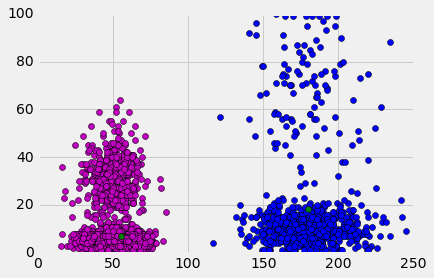

In [7]:
main()